In [1]:
# Installing packages used for analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#Reading the dataset
df = pd.read_csv("sample_interview_dataset.csv")
df

,UID,Machine Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Timestamp
0,M14860,x1,298.1,308.6,1551.0,42.8,0,0,No Failure,2001-12-01 00:00:00
1,L47181,x_1,298.2,308.7,1408.0,46.3,3,0,No Failure,2001-12-01 01:00:00
2,L47182,x_1,298.1,308.5,1498.0,49.4,5,0,No Failure,2001-12-01 02:00:00
3,L47183,x_1,298.2,308.6,1433.0,39.5,7,0,No Failure,2001-12-01 03:00:00
4,L47184,x_1,298.2,308.7,1408.0,40.0,9,0,No Failure,2001-12-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...
9995,M24855,x1,298.8,308.4,1604.0,29.5,14,0,No Failure,2003-01-21 11:00:00
9996,H39410,X1,298.9,308.4,1632.0,31.8,17,0,No Failure,2003-01-21 12:00:00
9997,M24857,x1,299.0,308.6,1645.0,33.4,22,0,No Failure,2003-01-21 13:00:00
9998,H39412,X1,299.0,308.7,1408.0,48.5,25,0,No Failure,2003-01-21 14:00:00


### Exploratory Analysis of the Dataset

#### Understanding Our Dataset

In [5]:
df.head()

,UID,Machine Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Timestamp
0,M14860,x1,298.1,308.6,1551.0,42.8,0,0,No Failure,2001-12-01 00:00:00
1,L47181,x_1,298.2,308.7,1408.0,46.3,3,0,No Failure,2001-12-01 01:00:00
2,L47182,x_1,298.1,308.5,1498.0,49.4,5,0,No Failure,2001-12-01 02:00:00
3,L47183,x_1,298.2,308.6,1433.0,39.5,7,0,No Failure,2001-12-01 03:00:00
4,L47184,x_1,298.2,308.7,1408.0,40.0,9,0,No Failure,2001-12-01 04:00:00


In [6]:
df.info()

# Note we have 100 missing values from Rotation Speed (rpm) that will be addressed before analsis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UID                      10000 non-null  object 
 1   Machine Type             10000 non-null  object 
 2   Air temperature [K]      10000 non-null  float64
 3   Process temperature [K]  10000 non-null  float64
 4   Rotational speed [rpm]   9900 non-null   float64
 5   Torque [Nm]              10000 non-null  float64
 6   Tool wear [min]          10000 non-null  int64  
 7   Target                   10000 non-null  int64  
 8   Failure Type             10000 non-null  object 
 9   Timestamp                10000 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 781.4+ KB


In [7]:
df.describe

<bound method NDFrame.describe of          UID Machine Type  Air temperature [K]  Process temperature [K]  \
0     M14860           x1                298.1                    308.6   
1     L47181          x_1                298.2                    308.7   
2     L47182          x_1                298.1                    308.5   
3     L47183          x_1                298.2                    308.6   
4     L47184          x_1                298.2                    308.7   
...      ...          ...                  ...                      ...   
9995  M24855           x1                298.8                    308.4   
9996  H39410           X1                298.9                    308.4   
9997  M24857           x1                299.0                    308.6   
9998  H39412           X1                299.0                    308.7   
9999  M24859           x1                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Targe

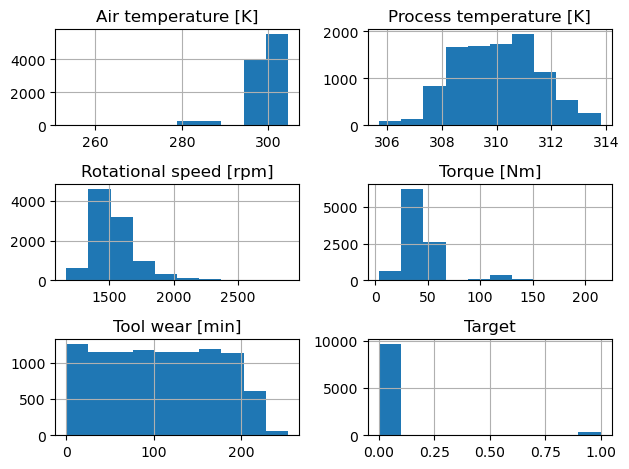

In [8]:
# Visualising the variable distributions 
# Plotting Numerical Data
df.hist()
plt.tight_layout()

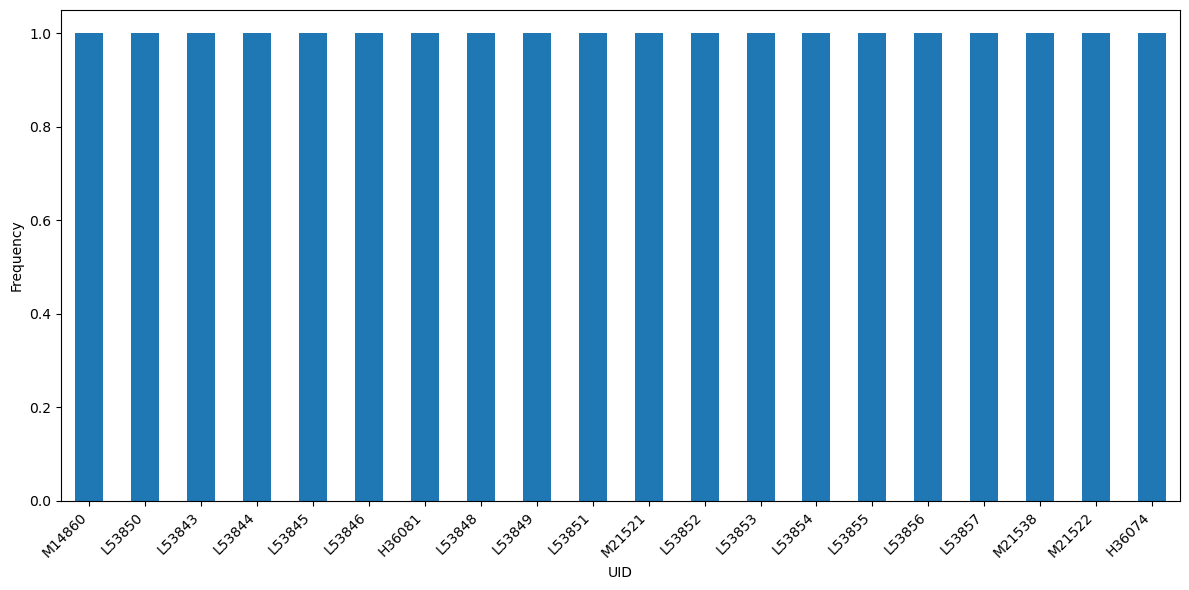

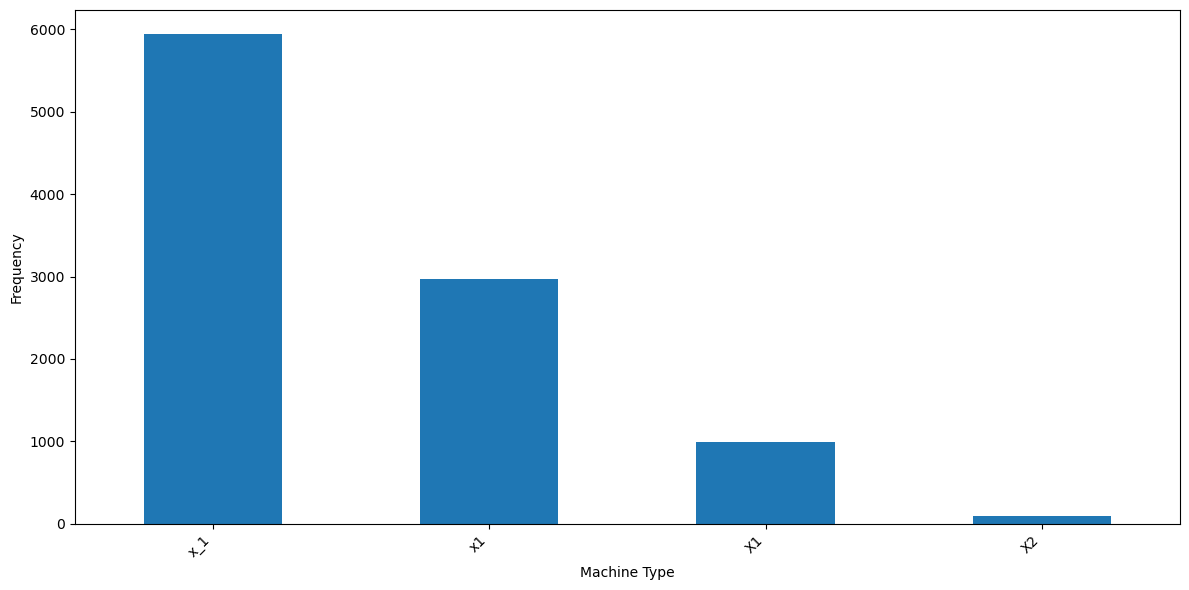

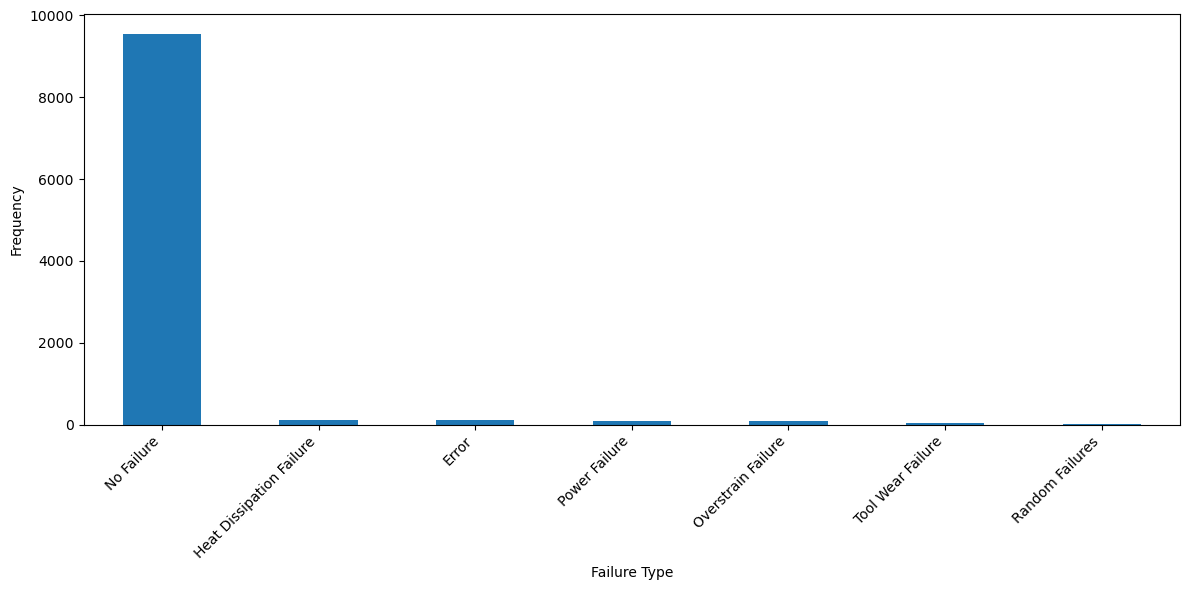

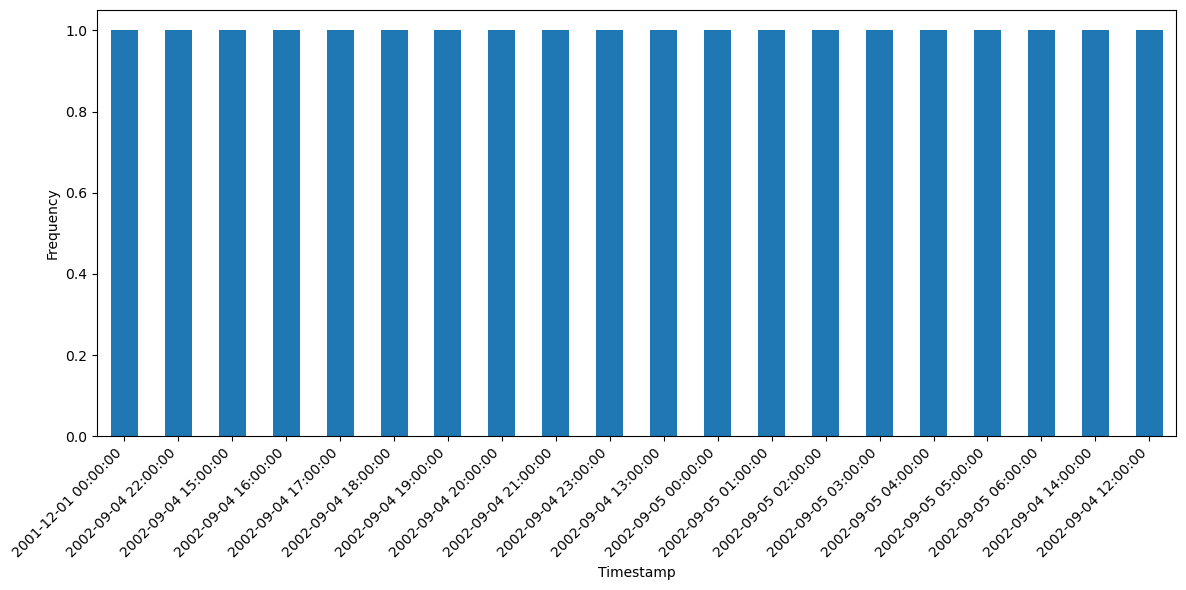

In [9]:
# Plotting Cateogorical Data
cat_col = df.select_dtypes(include=['object']).columns

for col in cat_col:
    counts = df[col].value_counts().head(20)  # show top 20 categories
    plt.figure(figsize=(12, 6))
    counts.plot(kind='bar')
    plt.ylabel('Frequency')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')  # Rotate labels
    plt.tight_layout()
    plt.show()


**From the initial EDA we understand that our data has:**
* The data has loaded correctly

* 10,000 entries and 10 columns.

* Mixed datatypes: 4 categorical, 4 numerical (float/int), and 2 identifier/timestamp.

* One column (Rotational speed [rpm]) has missing values (100 missing).

* Target appears to be a binary indicator — possibly failure occurrence.

* We have some class imbalance issues that need to be addressed i.e Target varaible/Failure Type

#### Quality Control

**In this section we examine our data for:**

* Completeness (missing data)
* Duplication
* Anomalous Results

In [12]:
# Examining for missing values (Note: 100 NA values found)
df.isnull().sum()

UID                          0
Machine Type                 0
Air temperature [K]          0
Process temperature [K]      0
Rotational speed [rpm]     100
Torque [Nm]                  0
Tool wear [min]              0
Target                       0
Failure Type                 0
Timestamp                    0
dtype: int64

In [13]:
# We are inserting the median value into the 100 missing values of "rotational speed". Note: Mean is not used here as distibution is skewed to the right

df['Rotational speed [rpm]'] = df['Rotational speed [rpm]'].fillna(df['Rotational speed [rpm]'].median())

df.isnull().sum() # We have solved the missing values in the dataset

UID                        0
Machine Type               0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
Timestamp                  0
dtype: int64